<a href="https://colab.research.google.com/github/strawbaeri/CCINSYSL_EXAM_COM-DF211/blob/main/exam_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam 💙 💛

Instructions ❗️❗️

❌ Do not remove or modify the notebook sections, subsections, exam questions or any text in this python notebook

✔️ Put your answer in the designated cells below each question

## K-Nearest Neighbor

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [3]:
df = load_breast_cancer(as_frame=True)
df = df['frame']

1. Display the first 5 rows of the dataset. `(5 points)`

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


2. Display the general information of the dataset. `(5 points)`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

3. Display the number of samples for each class/target in the dataset. `(5 points)`

In [7]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [33]:
mean_features = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension']
features = df[mean_features]


4. Using the mean features of the dataset, display the **correlation** of all the mean features in the dataset. `(5 points)`

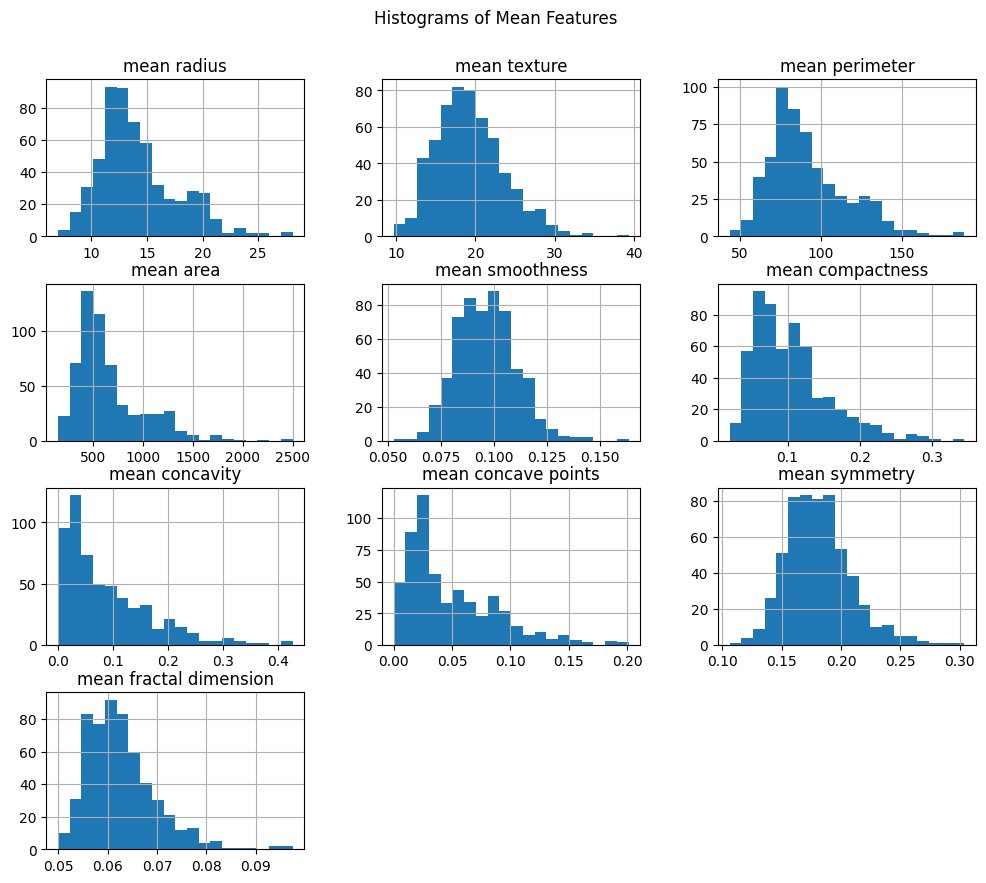

In [35]:
features.hist(figsize=(12,10), bins=20)
plt.suptitle('Histograms of Mean Features', y=0.95)
plt.show()

5. Draw a heatmap between all mean features of the dataset. `(5 points)`

<Axes: >

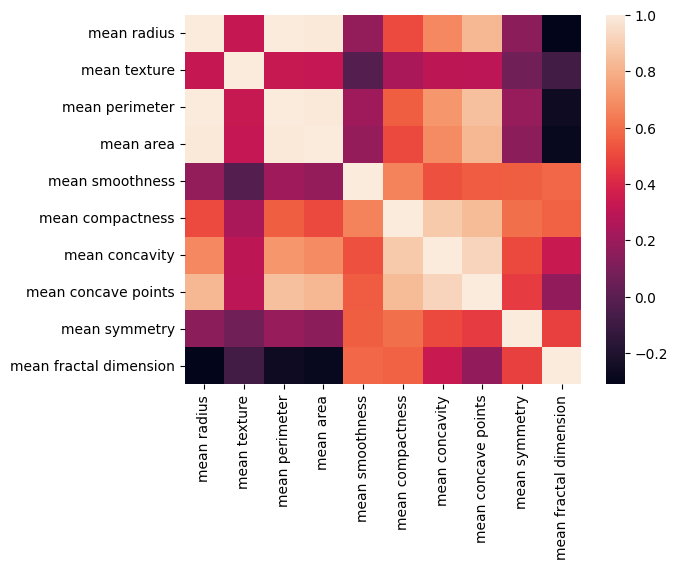

In [36]:
sns.heatmap(features.corr())

6. Split the data set into a training and test set. `(5 points)`

In [39]:
# Array of features
X = df.drop(columns=['target']).values

# Array of Labels
y = df['target'].values

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(398, 30)
(398,)
(171, 30)
(171,)


7. Create a new instance of the `KNeighborsClassifier` class and set your K parameter. `(5 points)`

In [107]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for K in k_range:

    knn = KNeighborsClassifier(n_neighbors=K)



8. Use the `fit()` method to train the KNN model. `(5 points)`

In [108]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for K in k_range:
    knn = KNeighborsClassifier(n_neighbors=K)

    # Train the model
    knn.fit(X_train, y_train)

9. Use the `predict()` method to make predictions using the test set. `(5 points)`

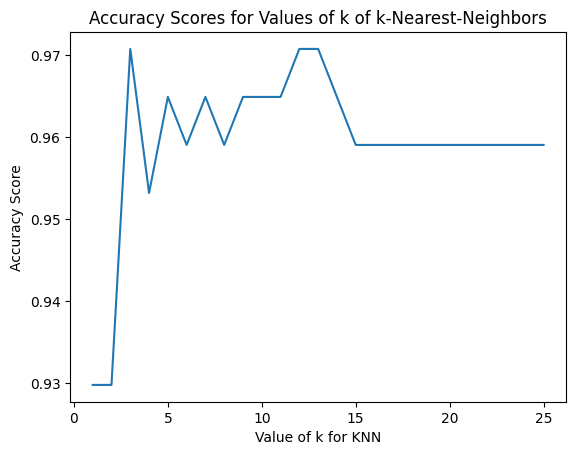

In [113]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for K in k_range:
    knn = KNeighborsClassifier(n_neighbors=K)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

10. Use the `accuracy_score()` method to get the accuracy of the KNN model. `(5 points)`

In [106]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9707602339181286